In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv("C:\\Users\\xiaoqian\\Desktop\\cpg-G_Fuji\\旅游景点票价预测\\data.csv") #导入文件
df.head(30) #查看前30行

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4A景区,四川·成都·成华区,热度 0.8,55.0,1574
1,青城山,5A景区,四川·成都·都江堰市,热度 0.96,80.0,596
2,成都海昌极地海洋公园,4A景区,四川·成都·双流区,热度 0.0,145.0,642
3,都江堰,5A景区,四川·成都·都江堰市,热度 1.0,80.0,378
4,成都动物园,NaN,四川·成都·成华区,热度 0.7,20.0,1170
5,成都欢乐谷,4A景区,四川·成都·金牛区,热度 0.74,100.0,506
6,成都武侯祠,4A景区,四川·成都·武侯区,热度 0.9,50.0,166
7,成都杜甫草堂博物馆,4A景区,四川·成都·青羊区,热度 0.86,50.0,162
8,花舞人间,4A景区,四川·成都·新津县,热度 0.0,61.4,1224
9,国色天乡·陆地乐园,NaN,四川·成都·国色天乡,热度 0.0,45.0,126


In [90]:
df.describe() #查看总值、平均值等

,price,num
count,675.000000,675.000000
mean,143.417956,147.776296
std,652.256150,674.864760
min,0.100000,2.000000
25%,24.950000,22.000000
50%,58.000000,56.000000
75%,128.000000,89.000000
max,14580.000000,14312.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    675 non-null    object 
 1   level   204 non-null    object 
 2   area    675 non-null    object 
 3   hot     675 non-null    object 
 4   price   675 non-null    float64
 5   num     675 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 31.8+ KB


#预处理空值

In [92]:
df['level'] = df['level'].fillna(0) #对空值填充0

In [93]:
df.head(10)

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4A景区,四川·成都·成华区,热度 0.8,55.0,1574
1,青城山,5A景区,四川·成都·都江堰市,热度 0.96,80.0,596
2,成都海昌极地海洋公园,4A景区,四川·成都·双流区,热度 0.0,145.0,642
3,都江堰,5A景区,四川·成都·都江堰市,热度 1.0,80.0,378
4,成都动物园,0,四川·成都·成华区,热度 0.7,20.0,1170
5,成都欢乐谷,4A景区,四川·成都·金牛区,热度 0.74,100.0,506
6,成都武侯祠,4A景区,四川·成都·武侯区,热度 0.9,50.0,166
7,成都杜甫草堂博物馆,4A景区,四川·成都·青羊区,热度 0.86,50.0,162
8,花舞人间,4A景区,四川·成都·新津县,热度 0.0,61.4,1224
9,国色天乡·陆地乐园,0,四川·成都·国色天乡,热度 0.0,45.0,126


In [94]:
df['level'] = df['level'].apply(lambda x:0 if x == 0 else int(x[0])) #简化景区等级，变为int型
df.head()

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4,四川·成都·成华区,热度 0.8,55.0,1574
1,青城山,5,四川·成都·都江堰市,热度 0.96,80.0,596
2,成都海昌极地海洋公园,4,四川·成都·双流区,热度 0.0,145.0,642
3,都江堰,5,四川·成都·都江堰市,热度 1.0,80.0,378
4,成都动物园,0,四川·成都·成华区,热度 0.7,20.0,1170


In [95]:
df['hot'] = df['hot'].apply(lambda x:float('%.2f'%float(x.split(' ')[-1]))) #简化热度，变为float型
df.head()

,name,level,area,hot,price,num
0,成都大熊猫繁育研究基地,4,四川·成都·成华区,0.80,55.0,1574
1,青城山,5,四川·成都·都江堰市,0.96,80.0,596
2,成都海昌极地海洋公园,4,四川·成都·双流区,0.00,145.0,642
3,都江堰,5,四川·成都·都江堰市,1.00,80.0,378
4,成都动物园,0,四川·成都·成华区,0.70,20.0,1170


In [96]:
#将地区分割为省，市，区
df['province'] = df['area'].apply(lambda x: x.split('·')[0])
df['city'] = df['area'].apply(lambda x: x.split('·')[1])
df['region'] = df['area'].apply(lambda x: x.split('·')[-1])

In [97]:
del df['area'] #删除地点这一列标签
df.head()

,name,level,hot,price,num,province,city,region
0,成都大熊猫繁育研究基地,4,0.80,55.0,1574,四川,成都,成华区
1,青城山,5,0.96,80.0,596,四川,成都,都江堰市
2,成都海昌极地海洋公园,4,0.00,145.0,642,四川,成都,双流区
3,都江堰,5,1.00,80.0,378,四川,成都,都江堰市
4,成都动物园,0,0.70,20.0,1170,四川,成都,成华区


In [98]:
num_top = df.sort_values(by="num",ascending=False)  #对num倒序
num_top

,name,level,hot,price,num,province,city,region
60,上海海昌海洋公园,4,0.00,294.00,14312,上海,上海,浦东新区
61,上海迪士尼乐园,0,0.00,355.00,5550,上海,上海,浦东新区
105,北京环球度假区,0,0.00,485.76,5194,北京,北京,通州区
109,故宫博物院,5,1.00,34.90,4377,北京,北京,东城区
69,南山文化旅游区,5,0.76,122.00,2610,海南,三亚,崖州区
...,...,...,...,...,...,...,...,...
529,千岛湖高空跳伞,0,0.00,2270.00,2,浙江,杭州,建德市
650,纪晓岚故居,0,0.70,9.70,2,北京,北京,西城区
461,上海外滩星空艺术馆,0,0.00,58.00,2,上海,上海,黄浦区
508,孔庙和国子监博物馆,4,0.00,0.70,2,北京,北京,东城区


In [99]:
num_top = num_top.reset_index(drop=True) #重置索引
num_top

,name,level,hot,price,num,province,city,region
0,上海海昌海洋公园,4,0.00,294.00,14312,上海,上海,浦东新区
1,上海迪士尼乐园,0,0.00,355.00,5550,上海,上海,浦东新区
2,北京环球度假区,0,0.00,485.76,5194,北京,北京,通州区
3,故宫博物院,5,1.00,34.90,4377,北京,北京,东城区
4,南山文化旅游区,5,0.76,122.00,2610,海南,三亚,崖州区
...,...,...,...,...,...,...,...,...
670,千岛湖高空跳伞,0,0.00,2270.00,2,浙江,杭州,建德市
671,纪晓岚故居,0,0.70,9.70,2,北京,北京,西城区
672,上海外滩星空艺术馆,0,0.00,58.00,2,上海,上海,黄浦区
673,孔庙和国子监博物馆,4,0.00,0.70,2,北京,北京,东城区


In [100]:
import seaborn as sns #导入seaborn画图工具
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #设置字体
sns.set(font = 'SimHei')

C:\Users\xiaoqian\AppData\Local\Temp\ipykernel_18856\3302883031.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


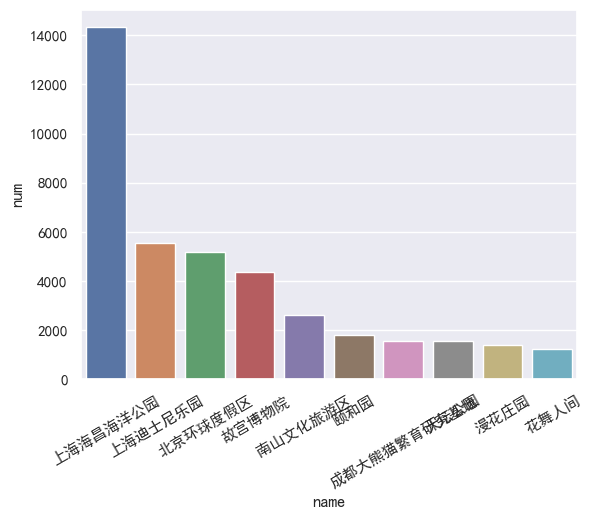

In [101]:
fig = plt.figure() #设置画布
sns.barplot(x = num_top['name'][:10],y = num_top['num'][:10]) #画柱状图
plt.xticks(rotation = 30) #标签旋转
fig.show()

In [102]:
df['level_sum'] = 1 #新建标签，用于汇总
var = df.groupby(['province','level'])['level_sum'].sum() #按照省份，景区等级汇总
var

province  level
上海        0         50
          3          2
          4         18
          5          4
北京        0         40
          4         24
          5         10
四川        0         58
          4         15
          5          2
广东        0        116
          4         29
          5          4
江苏        4          1
浙江        0         55
          3          1
          4         16
          5          4
海南        0         63
          4          6
          5          6
重庆        0         38
          4         28
          5          9
陕西        0         51
          3          1
          4         17
          5          7
Name: level_sum, dtype: int64

In [103]:
var_df = var.unstack() 
var_df

level,0,3,4,5
province,,,,
上海,50.0,2.0,18.0,4.0
北京,40.0,NaN,24.0,10.0
四川,58.0,NaN,15.0,2.0
广东,116.0,NaN,29.0,4.0
江苏,NaN,NaN,1.0,NaN
浙江,55.0,1.0,16.0,4.0
海南,63.0,NaN,6.0,6.0
重庆,38.0,NaN,28.0,9.0
陕西,51.0,1.0,17.0,7.0


<Axes: xlabel='province'>

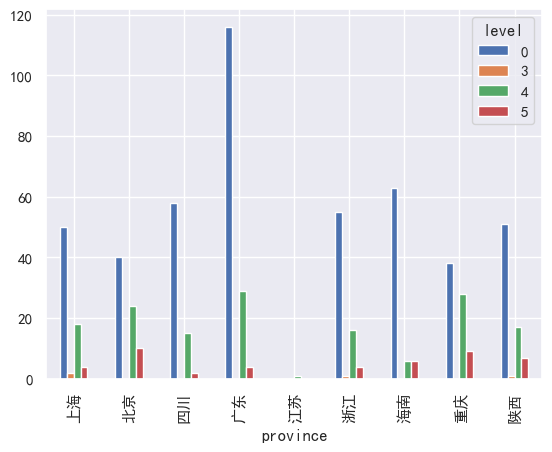

In [104]:
var_df.plot(kind="bar")

In [105]:
top_5A = df[df['level']==5].sort_values(by='num',ascending=False)
top_5A
top_5A_sort = top_5A.reset_index(drop=True)
top_5A_sort

,name,level,hot,price,num,province,city,region,level_sum
0,故宫博物院,5,1.00,34.9,4377,北京,北京,东城区,1
1,南山文化旅游区,5,0.76,122.0,2610,海南,三亚,崖州区,1
2,颐和园,5,0.82,19.0,1792,北京,北京,海淀区,1
3,天坛公园,5,0.80,9.4,1562,北京,北京,东城区,1
4,恭王府,5,0.74,39.6,1208,北京,北京,西城区,1
5,八达岭长城,5,0.82,34.6,1084,北京,北京,延庆县,1
6,三亚蜈支洲岛旅游区,5,0.86,140.0,888,海南,三亚,海棠区,1
7,秦始皇帝陵博物院（兵马俑）,5,0.88,120.0,886,陕西,西安,临潼区,1
8,青城山,5,0.96,80.0,596,四川,成都,都江堰市,1
9,圆明园,5,0.76,9.9,556,北京,北京,海淀区,1


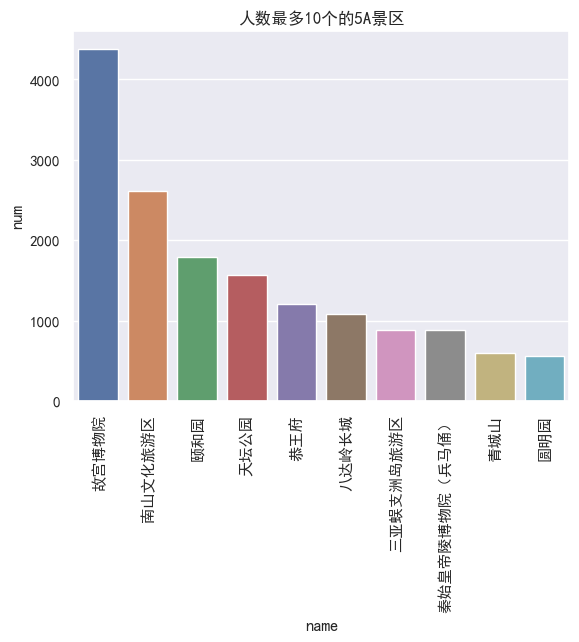

In [106]:
sns.barplot(x = top_5A_sort['name'][:10],y = top_5A_sort['num'][:10])
plt.title("人数最多10个的5A景区")
plt.xticks(rotation = 90)
plt.show()

In [107]:
df['level'].value_counts()

0    471
4    154
5     46
3      4
Name: level, dtype: int64

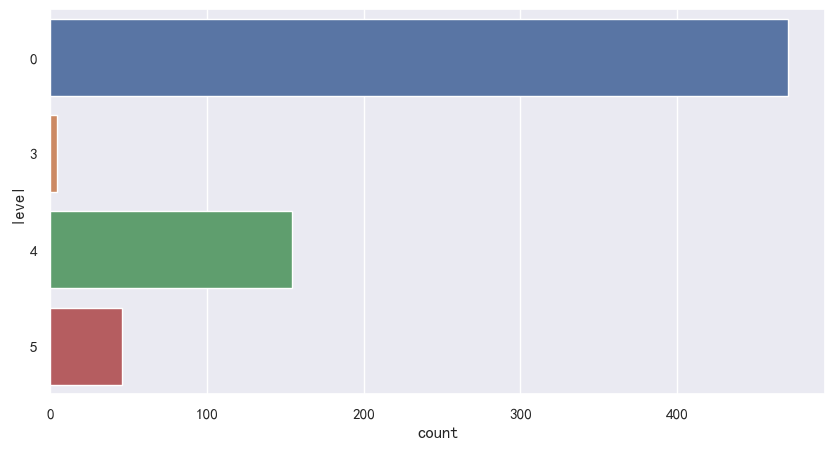

In [108]:
plt.figure(figsize = (10,5))
sns.countplot(y = 'level',data = df)
plt.show()

In [109]:
plt.rcParams['axes.unicode_minus'] = False

C:\Users\xiaoqian\AppData\Local\Temp\ipykernel_18856\3854119141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hot'],color = 'green')


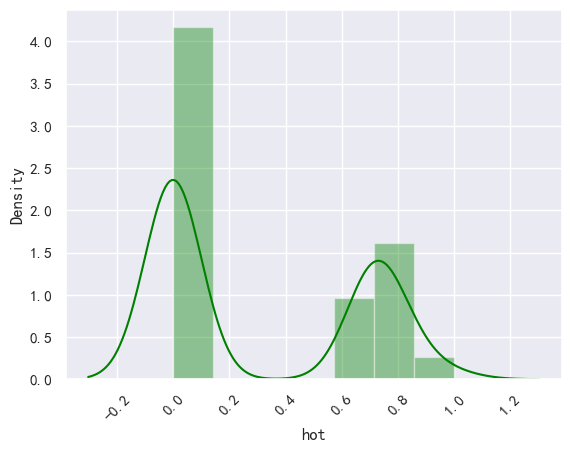

In [110]:
sns.distplot(df['hot'],color = 'green')
plt.xticks(rotation = 45)
plt.show()

In [111]:
df.describe()

,level,hot,price,num,level_sum
count,675.000000,675.000000,675.000000,675.000000,675.0
mean,1.271111,0.302756,143.417956,147.776296,1.0
std,1.948669,0.370356,652.256150,674.864760,0.0
min,0.000000,0.000000,0.100000,2.000000,1.0
25%,0.000000,0.000000,24.950000,22.000000,1.0
50%,0.000000,0.000000,58.000000,56.000000,1.0
75%,4.000000,0.720000,128.000000,89.000000,1.0
max,5.000000,1.000000,14580.000000,14312.000000,1.0


In [112]:
df = df.drop(df[df['price']>400].index)
df.describe()

,level,hot,price,num,level_sum
count,653.000000,653.000000,653.000000,653.000000,653.0
mean,1.300153,0.307289,81.244043,142.727412,1.0
std,1.960175,0.371329,78.289723,656.844963,0.0
min,0.000000,0.000000,0.100000,2.000000,1.0
25%,0.000000,0.000000,24.000000,20.000000,1.0
50%,0.000000,0.000000,58.000000,55.000000,1.0
75%,4.000000,0.720000,119.000000,89.000000,1.0
max,5.000000,1.000000,399.000000,14312.000000,1.0


C:\Users\xiaoqian\AppData\Local\Temp\ipykernel_18856\4066975588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color = 'orange')


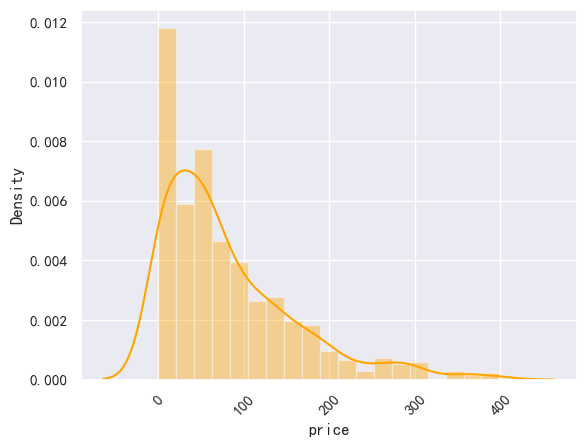

In [113]:
sns.distplot(df['price'],color = 'orange')
plt.xticks(rotation = 45)
plt.show()

C:\Users\xiaoqian\AppData\Local\Temp\ipykernel_18856\3765379429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num'])


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]),
 [Text(-2000.0, 0, '-2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000')])

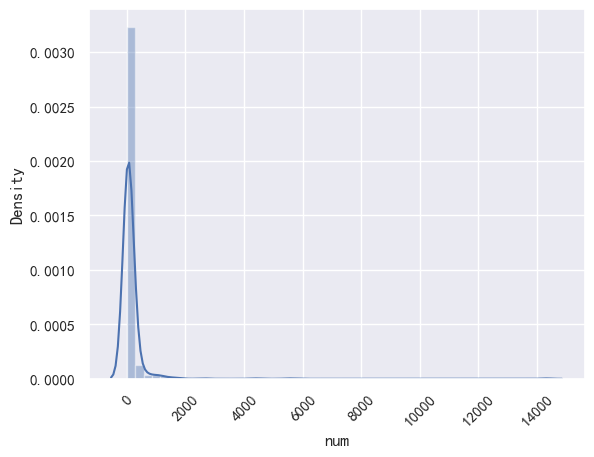

In [114]:
sns.distplot(df['num'])
plt.xticks(rotation = 45)

<Axes: xlabel='count', ylabel='num_cut'>

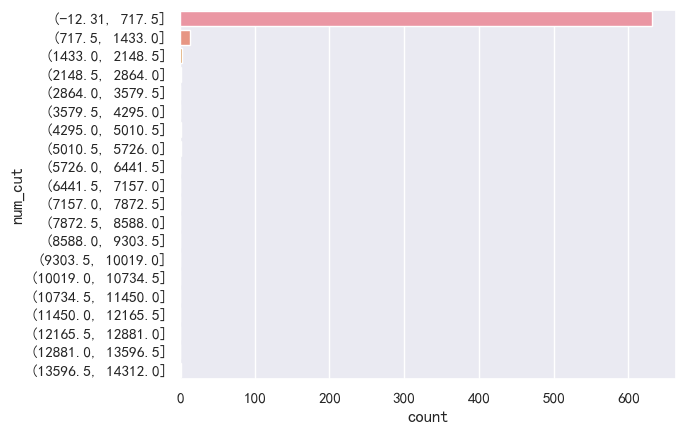

In [115]:
df['num_cut'] = pd.cut(df['num'],20)  #切分销量
plt.figure()
sns.countplot(y='num_cut',data=df)

In [116]:
df.head()

,name,level,hot,price,num,province,city,region,level_sum,num_cut
0,成都大熊猫繁育研究基地,4,0.80,55.0,1574,四川,成都,成华区,1,"(1433.0, 2148.5]"
1,青城山,5,0.96,80.0,596,四川,成都,都江堰市,1,"(-12.31, 717.5]"
2,成都海昌极地海洋公园,4,0.00,145.0,642,四川,成都,双流区,1,"(-12.31, 717.5]"
3,都江堰,5,1.00,80.0,378,四川,成都,都江堰市,1,"(-12.31, 717.5]"
4,成都动物园,0,0.70,20.0,1170,四川,成都,成华区,1,"(717.5, 1433.0]"


In [117]:
df = df.drop(['level_sum','num_cut'],axis = 1)

In [122]:
df.head(10)

,name,level,hot,price,num,province,city,region
0,成都大熊猫繁育研究基地,4,0.80,55.0,1574,四川,成都,成华区
1,青城山,5,0.96,80.0,596,四川,成都,都江堰市
2,成都海昌极地海洋公园,4,0.00,145.0,642,四川,成都,双流区
3,都江堰,5,1.00,80.0,378,四川,成都,都江堰市
4,成都动物园,0,0.70,20.0,1170,四川,成都,成华区
5,成都欢乐谷,4,0.74,100.0,506,四川,成都,金牛区
6,成都武侯祠,4,0.90,50.0,166,四川,成都,武侯区
7,成都杜甫草堂博物馆,4,0.86,50.0,162,四川,成都,青羊区
8,花舞人间,4,0.00,61.4,1224,四川,成都,新津县
9,国色天乡·陆地乐园,0,0.00,45.0,126,四川,成都,国色天乡


In [121]:
one_hot_df = pd.get_dummies(df[['province','city','region']])
one_hot_df.head(10)

,province_上海,province_北京,province_四川,province_广东,province_江苏,province_浙江,province_海南,province_重庆,province_陕西,city_三亚,...,region_雁塔区,region_青城山,region_青浦区,region_青羊区,region_静安区,region_黄埔区,region_黄浦区,region_龙华新区,region_龙岗区,region_龙泉驿
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df = df[['level','hot','price','num']]
df = pd.merge(df,one_hot_df,left_index=True,right_index=True)
df.head()

,level,hot,price,num,province_上海,province_北京,province_四川,province_广东,province_江苏,province_浙江,...,region_雁塔区,region_青城山,region_青浦区,region_青羊区,region_静安区,region_黄埔区,region_黄浦区,region_龙华新区,region_龙岗区,region_龙泉驿
0,4,0.80,55.0,1574,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0.96,80.0,596,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0.00,145.0,642,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1.00,80.0,378,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.70,20.0,1170,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
from sklearn.model_selection import train_test_split #切分数据集
from sklearn.ensemble import RandomForestRegressor  #RFC
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [127]:
X = df[df.columns.difference(['price'])]
Y = df['price']
#定义特征和标签

In [128]:
#拆分数据集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=999)

In [129]:
rf = RandomForestRegressor(n_estimators=20,max_depth=7) #建立模型
rf.fit(X_train,Y_train)  #模型训练
pred = rf.predict(X_test)  #拿训练模型对测试集进行预测
pred

array([ 88.91385017,  49.07830998, 153.49888128,  56.78986444,
        88.91385017,  51.12349711,  78.07111995,  81.03901989,
        60.38911597, 128.36700117,  88.91385017,  99.17149696,
        51.12349711,  51.12349711,  46.69003019,  56.08584188,
       130.30851327,  71.31686327,  62.00662983,  75.20737413,
       113.92391903,  65.83768581,  79.01442793,  59.02320297,
        59.02320297,  66.36028073,  88.91385017,  89.5744826 ,
       141.53455146,  75.20737413,  78.07111995,  50.8041195 ,
        81.03901989,  78.07111995,  56.08584188, 257.33668092,
        48.2597513 ,  54.06085821,  51.61540325,  38.23512817,
        78.07111995,  56.08584188,  60.38911597,  85.72822517,
        46.21456416,  71.10003465,  92.65257658,  78.73175238,
        49.07830998,  59.06926873,  61.49427672,  81.03901989,
        55.29641367,  54.06085821,  48.2597513 ,  77.44711909,
        78.07111995, 125.19467638,  79.01442793,  71.10820326,
        52.24440519,  46.63285502,  51.12349711, 106.81

In [131]:
print('MSE',mean_squared_error(Y_test,pred))
print('MAE',mean_absolute_error(Y_test,pred))

MSE 6414.300900407255
MAE 57.13727477833226
